<a href="https://colab.research.google.com/github/nam3user/comp_ling-course/blob/main/vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bag-of-Words

In [ ]:
!pip install gensim

In [ ]:
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint

In [ ]:
# Данные для примера
documents = [
    "кошка сидит на ковре",
    "собака бегает по двору",
    "кошка играет с собакой",
    "птица летит высоко в небе",
    "собака и кошка дружат"
]

print("Исходные документы:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

Исходные документы:
1. кошка сидит на ковре
2. собака бегает по двору
3. кошка играет с собакой
4. птица летит высоко в небе
5. собака и кошка дружат


In [ ]:
# Токенизация
tokenized_docs = [doc.lower().split() for doc in documents]
print("Токенизированные документы:")
pprint(tokenized_docs)

Токенизированные документы:
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]


In [ ]:
# Создание словаря
dictionary = corpora.Dictionary(tokenized_docs)
print(f"Словарь: {dictionary.token2id}")

Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}


In [ ]:
# Создание Bag-of-Words представления
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print("Bag-of-Words векторы (индекс_слова: частота):")
for i, doc_vec in enumerate(bow_corpus, 1):
    print(f"Документ {i}: {doc_vec}")

Bag-of-Words векторы (индекс_слова: частота):
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]


```
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]
 ```

```
Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}
```

In [ ]:
# Преобразование в плотные векторы для визуализации
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)
print("Плотные векторы Bag-of-Words:")
print("Слова:", list(dictionary.token2id.keys()))
for i, vec in enumerate(dense_vectors, 1):
    print(f"Док {i}: {vec}")

Плотные векторы Bag-of-Words:
Слова: ['ковре', 'кошка', 'на', 'сидит', 'бегает', 'двору', 'по', 'собака', 'играет', 'с', 'собакой', 'в', 'высоко', 'летит', 'небе', 'птица', 'дружат', 'и']
Док 1: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 2: [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 3: [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Док 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
Док 5: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


```
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]
```

Matrix shape: (5, 18)


Text(0.5, 36.72222222222221, 'Words')

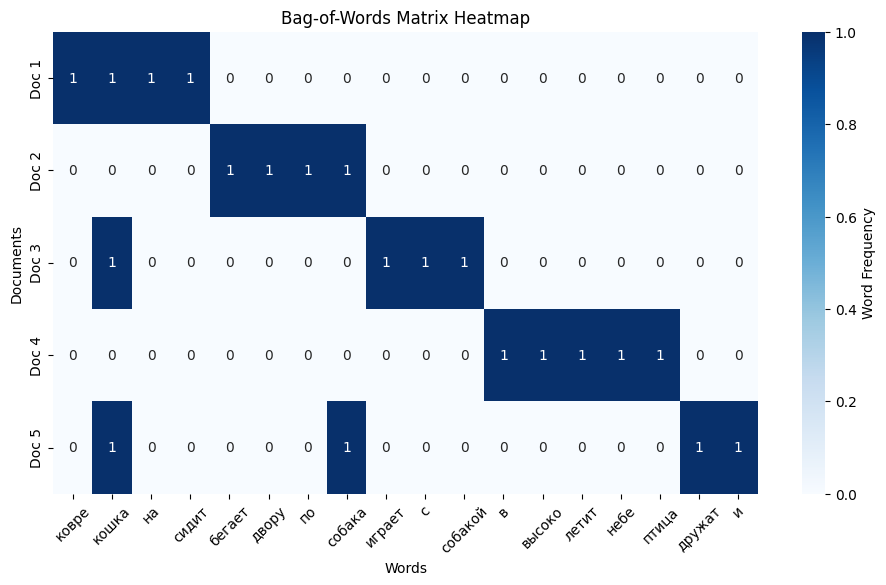

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация
matrix = np.array(dense_vectors)
words = list(dictionary.token2id.keys())
doc_names = [f"Doc {i+1}" for i in range(len(documents))]

print(f"Matrix shape: {matrix.shape}")

plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap')
plt.xticks(rotation=45)
plt.ylabel('Documents')
plt.xlabel('Words')


### TF-IDF

In [ ]:
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF векторы (индекс_слова: tfidf_вес):")
for i, doc_vec in enumerate(tfidf_corpus, 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc_vec]}")

TF-IDF векторы (индекс_слова: tfidf_вес):
Документ 1: [('ковре', np.float64(0.568)), ('кошка', np.float64(0.18)), ('на', np.float64(0.568)), ('сидит', np.float64(0.568))]
Документ 2: [('бегает', np.float64(0.548)), ('двору', np.float64(0.548)), ('по', np.float64(0.548)), ('собака', np.float64(0.312))]
Документ 3: [('кошка', np.float64(0.18)), ('играет', np.float64(0.568)), ('с', np.float64(0.568)), ('собакой', np.float64(0.568))]
Документ 4: [('в', np.float64(0.447)), ('высоко', np.float64(0.447)), ('летит', np.float64(0.447)), ('небе', np.float64(0.447)), ('птица', np.float64(0.447))]
Документ 5: [('кошка', np.float64(0.204)), ('собака', np.float64(0.366)), ('дружат', np.float64(0.642)), ('и', np.float64(0.642))]


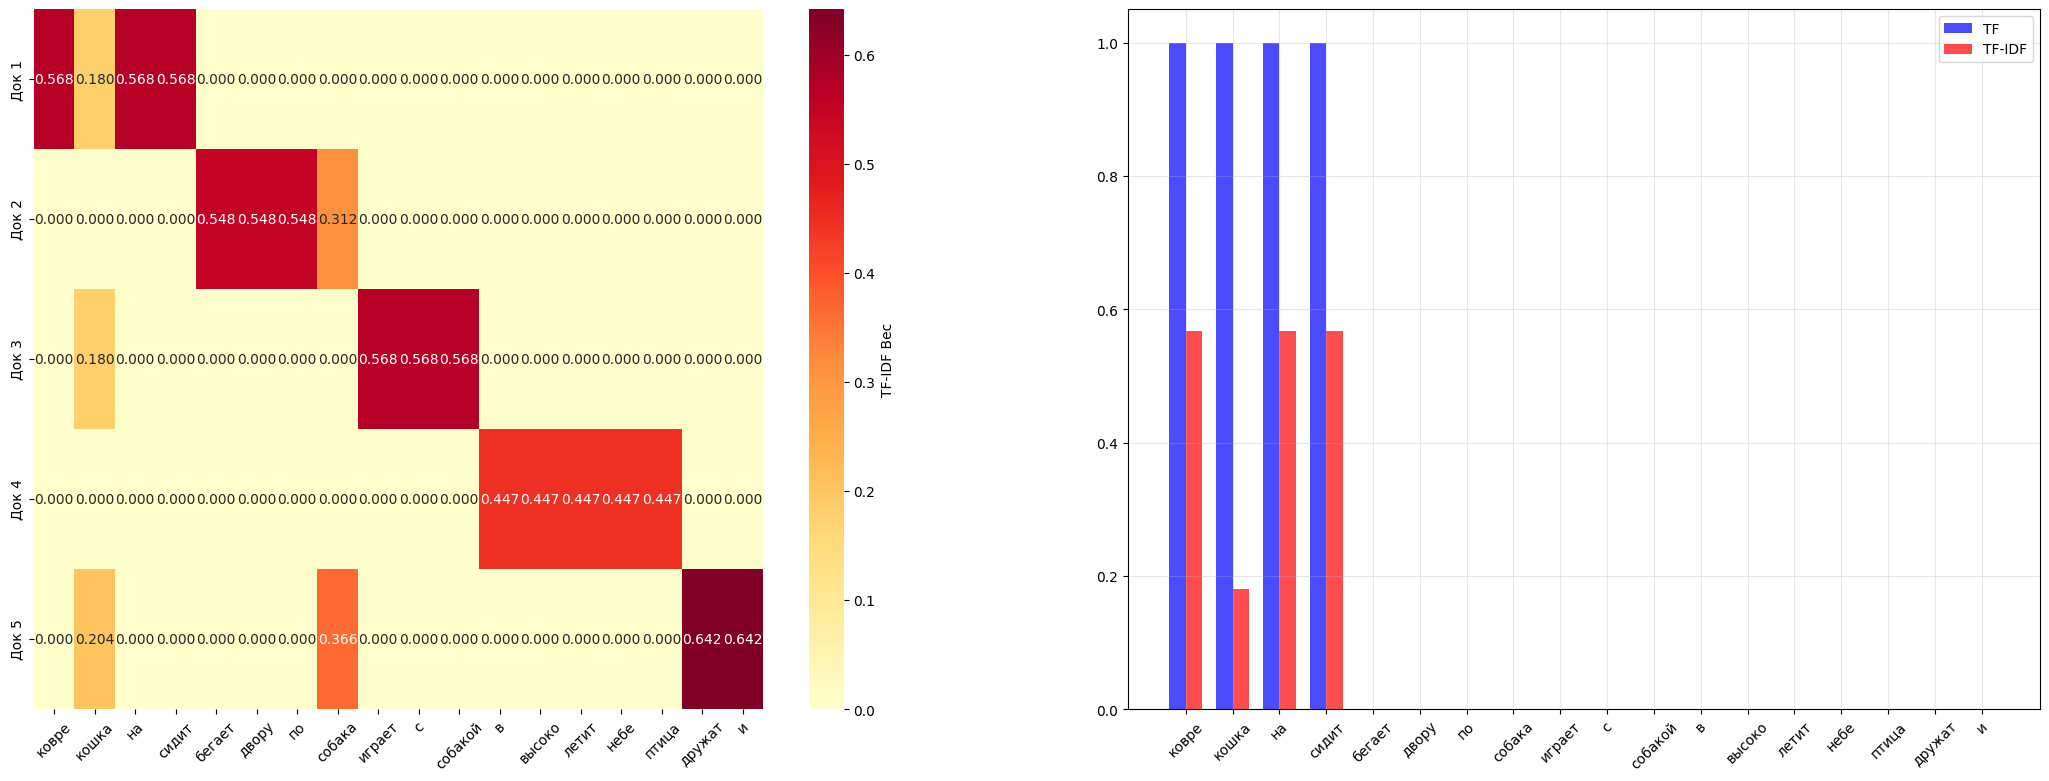

In [ ]:
# Преобразуем TF-IDF в плотную матрицу для визуализации
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return dense_vectors

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)
tfidf_matrix = np.array(tfidf_dense)
words = list(dictionary.token2id.keys())
doc_names = [f"Док {i+1}" for i in range(len(tfidf_corpus))]

plt.figure(figsize=(40, 20))

plt.subplot(2, 3, 1)
sns.heatmap(tfidf_matrix,
            annot=True,
            fmt='.3f',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Вес'})
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
# Получаем исходные TF значения из bow_corpus
tf_dense = bow_to_dense(bow_corpus, dictionary)
tf_matrix = np.array(tf_dense)

# Сравниваем TF и TF-IDF для первого документа
doc_idx = 0
x_pos = np.arange(len(words))
width = 0.35

plt.bar(x_pos - width/2, tf_matrix[doc_idx], width, label='TF', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, tfidf_matrix[doc_idx], width, label='TF-IDF', alpha=0.7, color='red')
plt.xticks(x_pos, words, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

#### **1. TF (Term Frequency) - Частота термина**
```python
TF(t,d) = count(t,d) / total_terms(d)
```
или упрощенно:
```python
TF(t,d) = count(t,d)  # просто количество вхождений
```

#### **2. IDF (Inverse Document Frequency) - Обратная частота документа**
```python
IDF(t) = log( N / (DF(t) + 1) ) + 1
```
Где:
- **N** - общее количество документов
- **DF(t)** - количество документов, содержащих слово t
- **+1** в знаменателе - сглаживание, чтобы не было "околонулевых" значений (smoothing)
- **+1** в конце - для избежания нулевых весов

#### **3. TF-IDF - итоговый вес**
```python
TF-IDF(t,d) = TF(t,d) × IDF(t)
```

**Сравнение разных формул IDF**

| Формула | Редкое слово (DF=1) | Частое слово (DF=100) | Сверхчастое (DF=990) |
|---------|---------------------|----------------------|---------------------|
| `log(N/DF)` | 6.91 | 2.30 | 0.01 |
| `log(N/(DF+1))` | 6.90 | 2.29 | 0.009 |
| `log(N/(DF+1)) + 1` | **7.90** | **3.29** | **1.009** |


### Word2Vec

In [ ]:
# Используем небольшую модель для демонстрации
print("Загрузка предобученной модели Word2Vec...")
w2v_model = api.load("glove-wiki-gigaword-50")  # Маленькая модель

# Функция для получения эмбеддинга документа
def get_doc_embedding(tokens, model):
    word_vectors = []
    for token in tokens:
        try:
            word_vectors.append(model[token])
        except KeyError:
            continue
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Получаем эмбеддинги для документов
doc_embeddings = []
for i, tokens in enumerate(tokenized_docs):
    embedding = get_doc_embedding(tokens, w2v_model)
    doc_embeddings.append(embedding)
    print(f"\nДокумент {i+1}: {documents[i]}")
    print(f"Эмбеддинг (первые 10 значений): {embedding[:10].round(4)}")
    print(f"Размер: {embedding.shape}")

# Косинусная схожесть между документами
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(doc_embeddings)
print("\nМатрица косинусной схожести:")
print("     Д1    Д2    Д3    Д4    Д5")
for i, row in enumerate(similarity_matrix):
    print(f"Д{i+1}  " + "  ".join([f"{x:.3f}" for x in row]))

Загрузка предобученной модели Word2Vec...

Документ 1: кошка сидит на ковре
Эмбеддинг (первые 10 значений): [-1.3191  1.5595  0.0702 -0.4633 -0.8065  0.3126  1.2403 -0.6641 -1.1753
 -0.4418]
Размер: (50,)

Документ 2: собака бегает по двору
Эмбеддинг (первые 10 значений): [-1.1564  0.7363 -0.162  -0.0846 -0.9603  0.3709  1.9096  0.0091 -0.388
 -0.8261]
Размер: (50,)

Документ 3: кошка играет с собакой
Эмбеддинг (первые 10 значений): [-1.5624  0.9866  0.1836 -1.0273 -0.8551 -0.0476  1.141  -0.6877 -0.2825
 -0.7102]
Размер: (50,)

Документ 4: птица летит высоко в небе
Эмбеддинг (первые 10 значений): [-1.0499  1.3412 -0.3431 -0.8776 -1.2784  0.1292  1.812  -0.3816 -0.9911
 -0.2818]
Размер: (50,)

Документ 5: собака и кошка дружат
Эмбеддинг (первые 10 значений): [-0.9957  1.3808 -0.3036 -0.7568 -0.9025  0.2521  1.4351 -0.4907 -1.3925
 -0.1646]
Размер: (50,)

Матрица косинусной схожести:
     Д1    Д2    Д3    Д4    Д5
Д1  1.000  0.856  0.811  0.873  0.873
Д2  0.856  1.000  0.784  0.859  0.

*Как работает Word2Vec мы разберем на следующей лекции..*

### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [ ]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-10-21 11:04:46--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>] 100.42K  --.-KB/s    in 0.02s   

2025-10-21 11:04:47 (6.40 MB/s) - ‘test.csv.1’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

3. Извлечь столбец с текстами (макс. балл == 1)

4. Построить Bag-of-Words (макс. балл == 3)

In [ ]:
# Задача 1.1: Создайте словарь и BoW представление (макс. балл == 2)
# - Приведите тексты к нижнему регистру
# - Удалите знаки препинания
# - Постройте словарь
# - Преобразуйте документы в BoW векторы

# Задача 1.2: Визуализируйте результаты (макс. балл == 1)
# - Создайте таблицу частот слов
# - Постройте heatmap матрицы BoW
# - Найдите самые частые слова в корпусе

5. Построить TF-IDF (макс. балл == 5)

In [ ]:
# Задача 2.1: Примените TF-IDF к BoW представлению (макс. балл == 2)
# - Используйте TfidfModel из gensim
# - Получите TF-IDF векторы для каждого документа

# Задача 2.2: Проанализируйте веса TF-IDF (макс. балл == 3)
# - Для каждого слова вычислите: (макс. балл == 2)
#   * TF (term frequency) в каждом документе
#   * DF (document frequency) во всем корпусе
#   * IDF (inverse document frequency)
#   * значение TF-IDF
# - Сохраните результат в *.сsv (макс. балл == 1)
# - Прикрепите *.csv в ваш репозиторий

##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

In [ ]:
# Сравните BoW и TF-IDF для конкретных слов
# - Выберите 3-4 слова из датасета (выберите слова, характерные для датасета)
# - Постройте графики сравнения их весов в BoW и TF-IDF

##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```